<a href="https://colab.research.google.com/github/Arjun-RY/Data_Science_Tasks/blob/main/Assignment_4_5_6_7_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment 4


df = pd.read_csv("boston_housing_dataset.csv")

In [60]:
df = pd.read_csv("housing.csv")


In [61]:
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [65]:
from sklearn.model_selection import train_test_split 
feature = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
x = df[feature]
y = df.MEDV
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred_test_lr= regressor.predict(X_test)
print('RSME of linear regression : ',np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print('R-squared of linear reg   : ',r2_score(y_test, pred_test_lr))

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_test_rr= rr.predict(X_test)
print('RSME of Ridge regression : ',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R-squared of Ridge reg   : ',r2_score(y_test, pred_test_rr))

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_test_lasso= model_lasso.predict(X_test)
print('RSME of Lasso regression : ',np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R-squared of Lasso reg   : ',r2_score(y_test, pred_test_lasso))

RSME of linear regression :  5.608949299595198
R-squared of linear reg   :  0.6913260664906781
RSME of Ridge regression :  5.6089792262601454
R-squared of Ridge reg   :  0.6913227726095833
RSME of Lasso regression :  5.614651715406107
R-squared of Lasso reg   :  0.6906981122040297


R-squared value of all the regressions are all same

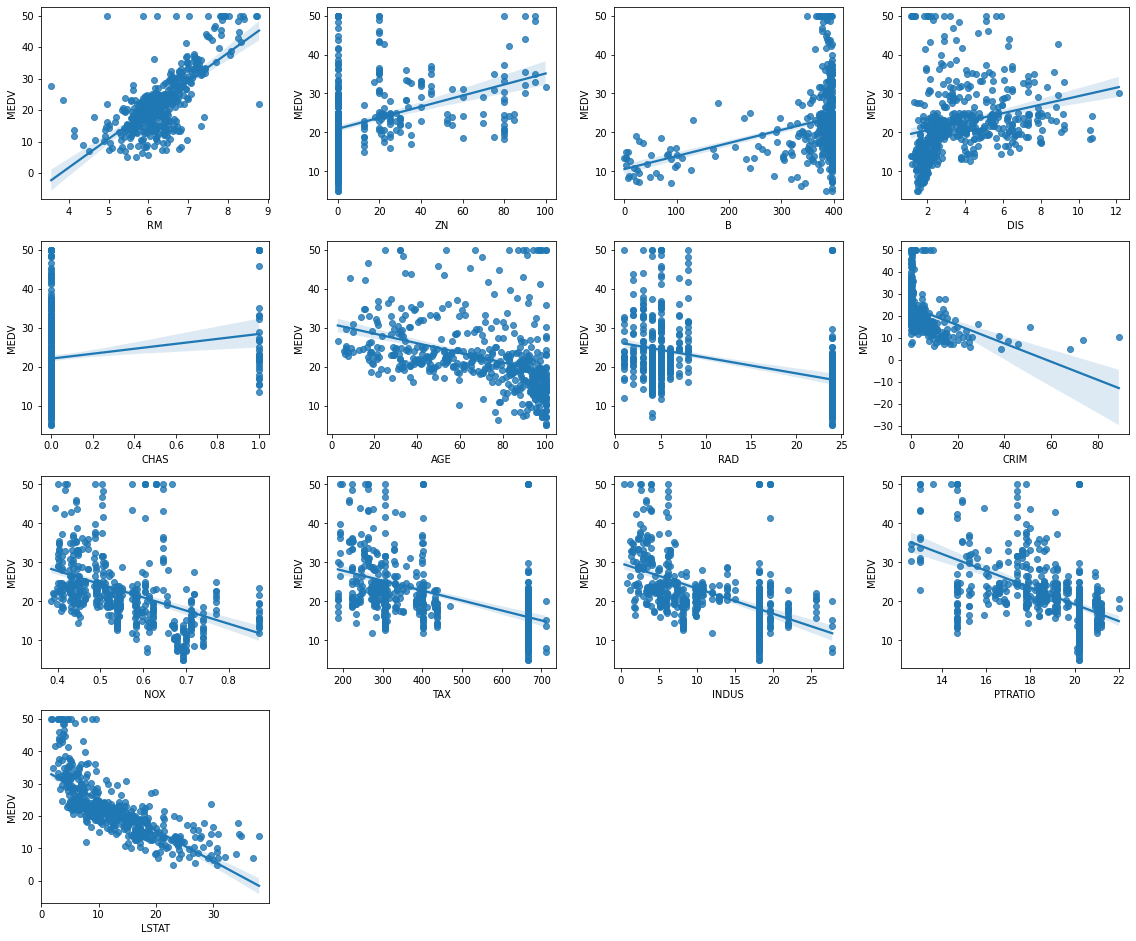

In [67]:
import seaborn as sns 

k  = 14
fig = plt.figure(figsize=(16,16))
# Correlations between each variable
corrmat = df.corr()
# Take k elements in descending order of coefficient 
cols = corrmat.nlargest(k, "MEDV")["MEDV"].index
# Calculate correlation
for i in np.arange(1,k):
    X_train = df[cols[i]]
    ax = fig.add_subplot(5,4,i)
    sns.regplot(x=X_train, y=df['MEDV'])
plt.tight_layout()
plt.show()

In [63]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [72]:
from sklearn.model_selection import train_test_split 
feature = ['RM','PTRATIO','LSTAT']
x = df[feature]
y = df.MEDV
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred_test_lr= regressor.predict(X_test)
print('RSME of linear regression : ',np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print('R-squared of linear reg   : ',r2_score(y_test, pred_test_lr))

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_test_rr= rr.predict(X_test)
print('RSME of Ridge regression : ',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R-squared of Ridge reg   : ',r2_score(y_test, pred_test_rr))

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_test_lasso= model_lasso.predict(X_test)
print('RSME of Lasso regression : ',np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R-squared of Lasso reg   : ',r2_score(y_test, pred_test_lasso))

RSME of linear regression :  6.259875149665346
R-squared of linear reg   :  0.6340385741795447
RSME of Ridge regression :  6.25988134085454
R-squared of Ridge reg   :  0.6340378502872971
RSME of Lasso regression :  6.260279173761618
R-squared of Lasso reg   :  0.633991332979906


# Assignment 5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [7]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


There is a linear relationship between hours and score => we can go ahead and develop a linear regression model. No transformation required.

Chirps/Second = [0.20299973]*(Ground Temperature)  + 0.45931464523595267
r-squared:  0.6922946529146998


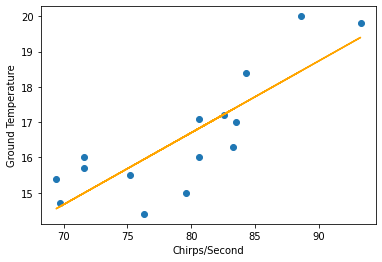

When Ground temperature is 95, the chirps/second =  19.7
When the chirping rate is 18 , the ground temperature =  86.4


In [6]:
x = df['Ground Temperature']
x = x.to_frame()
y = df['Chirps/Second']
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print(f'Chirps/Second = {linreg.coef_}*(Ground Temperature)  + {linreg.intercept_}')
print('r-squared: ', linreg.score(x, y))
plt.scatter(x, y)
plt.plot(x, linreg.predict(x), color='orange')
plt.ylabel('Ground Temperature')
plt.xlabel('Chirps/Second')
plt.show()
Chirps = (0.20299973*95) + 0.45931464523595267
print('When Ground temperature is 95, the chirps/second = ',round(Chirps,1))
groundT= (18-0.45931464523595267)/0.20299973
print('When the chirping rate is 18 , the ground temperature = ',round(groundT,1))

In [9]:
linreg.predict([[95]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([19.74428913])

Since r-squared is not greater than 0.8, the correlation is not strong

# Assignment 6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

          Brain      Body
Brain  1.000000  0.934164
Body   0.934164  1.000000
Body_weight = [0.96649637]*(Brain_weight)  + 91.00439620740687
r-squared:  0.8726620843043331


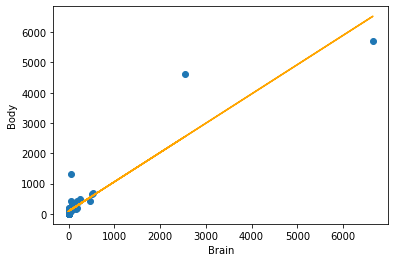

In [13]:
df = pd.read_fwf("brain_body.txt")
print(df.corr())
x = df['Brain']
x = x.to_frame()
y = df['Body']
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print(f'Body_weight = {linreg.coef_}*(Brain_weight)  + {linreg.intercept_}')
print('r-squared: ', linreg.score(x, y))
plt.scatter(x, y)
plt.plot(x, linreg.predict(x), color='orange')
plt.ylabel('Body')
plt.xlabel('Brain')
plt.show()

Since, the R-squared value (0.87) is greater than 0.8 the equation is good fit for this data

# Assignment 7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [25]:
df = pd.read_fwf("salary.txt", header=None, names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
x = df[feature]
y = df.Salary
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('Features & Coefficients')
print(list(zip(feature, linreg.coef_)))
print('r-squared: ', linreg.score(x, y))

Features & Coefficients
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]
r-squared:  0.8547180674410969




since r-squared value is greater than 0.8 , this is a good fit



In [38]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [39]:
df = pd.read_fwf("salary.txt", header=None, names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
feature = ['Rank', 'Year', 'YSdeg']
x = df[feature]
y = df.Salary
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('Features & Coefficients')
print(list(zip(feature, linreg.coef_)))
print('r-squared: ', linreg.score(x, y))

Features & Coefficients
[('Rank', 4973.643288821371), ('Year', 405.6710507060459), ('YSdeg', -40.86497466631948)]
r-squared:  0.8456725764485596


Since correlation between Sex and Salary is less than 0.5 and even when we delete drop the features Sex and degree , the R-squared value does not change much. Hence Sex is not a factor in salary

# Assignment 8


# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

Mileage = [[-0.1725205]]*Price + [24764.55900606]
R-squared = 0.0205


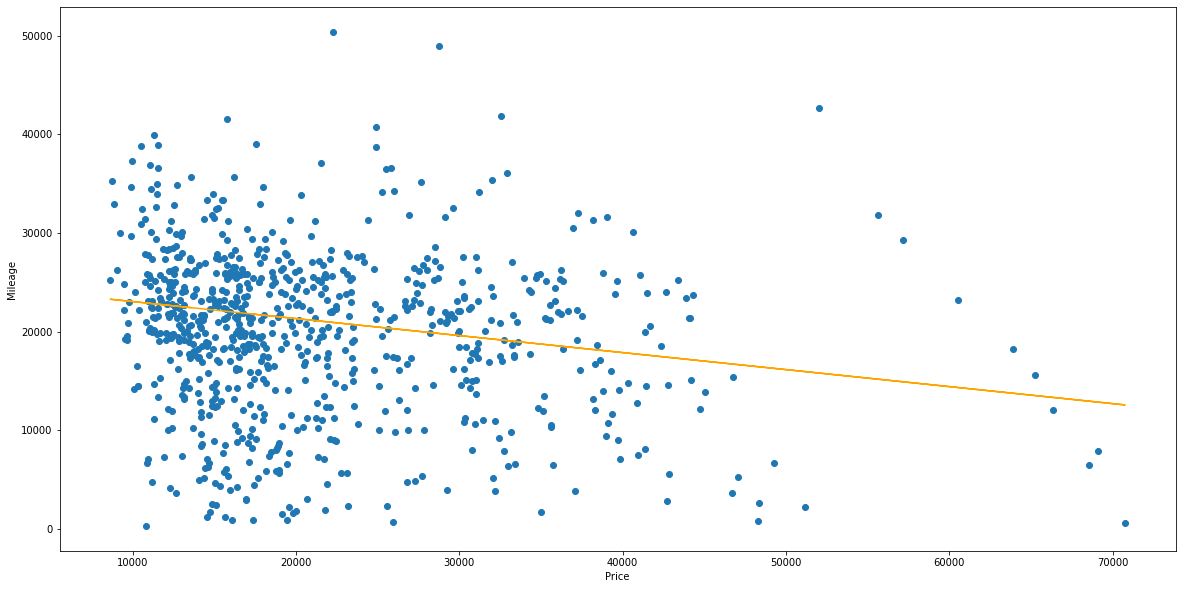

weak correlation


In [41]:
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("car_data.csv")
y = df[["Price"]]
x = df[["Mileage"]]
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print(f'Mileage = {linreg.coef_}*Price + {linreg.intercept_}')
print('R-squared = {:.4f}'.format(linreg.score(x, y)))
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(y, x) 
plt.plot(y, linreg.predict(y), color='orange')
plt.xlabel("Price")
plt.ylabel('Mileage')
plt.show()
print('strong correlation' if linreg.score(x, y)>0.8 else 'weak correlation')

In [42]:
df = pd.read_csv("car_data.csv")
feature=['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
x = df[feature]
y = df.Price
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('Features & Coefficients')
print(list(zip(feature, linreg.coef_)))
print('r-squared: ', linreg.score(x, y))

Features & Coefficients
[('Mileage', -0.16974783233303692), ('Cylinder', 3792.378930782515), ('Liter', -787.2207316338321), ('Doors', -1542.745846382068), ('Cruise', 6288.997149849932), ('Sound', -1993.795275698427), ('Leather', 3349.361619613555)]
r-squared:  0.4462643536728379


r-squared value is less than 0.6 so there is weak correlation

In [17]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


since cylinder and liter have strong correlation(0.95) between them, we drop one feature
(liter) of them.